# 종합실습 02. 후판공정

### 패키지 불러오기

In [1]:
# 데이터 처리 및 기본 설정
import pandas as pd
import numpy as np
import platform

# 경고 메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

# 시각화 설정
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
else:
    plt.rcParams['font.family'] = 'AppleGothic'    # macOS, Linux
matplotlib.rc('axes', unicode_minus=False)         # 음수 깨짐 방지

# 데이터 분할
from sklearn.model_selection import train_test_split, GridSearchCV

# 회귀 분석
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 선형 회귀 및 변수 선택
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# 트리 계열 회귀 모델
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 나무 시각화
import graphviz

# 평가 지표
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# 정규성 검정
from scipy.stats import shapiro

# date
import datetime

import re

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from scipy.stats import ttest_ind, chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)



# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE

## 01. 데이터 구성

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv('/Users/minjoo/PoscoBAA/BigData/종합실습/종합실습2/SCALE불량.csv', encoding='euc-kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


## 02. 데이터 전처리

### 결측치 확인

In [3]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

## 목표변수

### scale : 양품 / 불량품

In [5]:
df_raw['scale'] = df_raw['scale'].map({
    '양품' : 0,
    '불량' : 1
})
df_raw.head()

# 양품 1, 불량 0

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


## 설명변수 

### plate_no : 삭제

In [6]:
df_raw.drop(columns=['plate_no'], inplace=True)
df_raw.head()

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,03JAN2023:07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,03JAN2023:07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,03JAN2023:07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,03JAN2023:07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,03JAN2023:07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


### rolling_date

In [7]:
df_raw['rolling_date'] = pd.to_datetime(df_raw['rolling_date'], format='%d%b%Y:%H:%M:%S')
df_raw.head()

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,2023-01-03 07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,2023-01-03 07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,2023-01-03 07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,2023-01-03 07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,2023-01-03 07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


### spec_long 
- 선체구조용       
- 용접구조용       
- 일반구조용       
- 교량구조용         
- 보일러압력용기용      
- 해양구조용  
- 기타

In [8]:
def classify_steel_use(spec):
    spec = str(spec).upper()

    # 선체구조용 (조선용)
    if any(keyword in spec for keyword in ['AB/', 'BV-', 'LR-', 'GL-', 'KR-', 'NK-', 'CCS-', 'NV-', 'A131']) \
        or re.search(r'\b(AH|DH|EH|FH|KA|KB|KD|KE|KF)[0-9]{2}\b', spec):
        
        return '선체구조용'

    # 해양구조용
    elif any(keyword in spec for keyword in [
        'API-2H', 'API-2W',
        'S355G2+N', 'S355G3+N', 'S355G7+N', 'S355G8+N', 'S355G9+N', 'S355G10+N',
        'S355G5+M', 'S355G6+M', 'S355G7+M', 'S355G8+M', 'S355G9+M', 'S355G10+M',
        'S420G1+M', 'S420G2+M', 'S460G1+M', 'S460G2+M',
        'S420G1+QT', 'S420G2+QT', 'S460G1+QT', 'S460G2+QT',
        'A420', 'D420', 'E420', 'EW420', 'DW420',
        'Y05', 'Y20', 'Y30', 'Y40', 'Y50',
        'S355KT/KL+20', 'S355KT/KL0', 'S355KT/KL-20', 'S355KT/KL-40'
    ]):
        return '해양구조용'

    # 교량구조용
    elif any(keyword in spec for keyword in [
        'HSB380', 'HSB380L', 'HSB380W', 'HSB460', 'HSB460L', 'HSB460W',
        'HSB690', 'HSB690L', 'HSB690W', 'HSB500', 'HSB500L', 'HSB500W',
        'HSB600', 'HSB600L', 'HSB600W', 'HSB800', 'HSB800L', 'HSB800W',
        'A709'
    ]):
        return '교량구조용'

    # 일반구조용
    elif any(keyword in spec for keyword in [
        'SS235', 'SS275', 'SS315', 'SS410', 'SS450', 'SS550',
        'SS400', 'SS490', 'SS540', 'A36', '250', '300', '350', '400'
    ]):
        return '일반구조용'

    # 용접구조용
    elif any(keyword in spec for keyword in [
        'SM275', 'SM355', 'SM420', 'SM460', 'SM400', 'SM490', 'SM520', 'SM570',
        'S235', 'S275', 'S355', 'S450',
        'A283', 'A572', 'A573', '300W', '350W', '380W'
    ]):
        return '용접구조용'

    # 건축구조용
    elif any(keyword in spec for keyword in [
        'SN275', 'SN355', 'SN460', 'SN400', 'SN490', 'HSA800'
    ]):
        return '건축구조용'

    # 기계구조용
    elif any(keyword in spec for keyword in [
        'SM', 'S10C', 'S12C', 'S15C', 'S17C', 'S20C', 'S22C', 'S25C',
        'S28C', 'S30C', 'S33C', 'S35C', 'S38C', 'S40C', 'S43C', 'S45C', 'S48C',
        'S50C', 'S53C', 'S55C', 'S58C', 'S9CK', 'S15CK', 'S20CK', '1045'
    ]):
        return '기계구조용'

    # 저온 압력용기용
    elif any(keyword in spec for keyword in [
        'SLN2N255', 'SLN3N255', 'SLN3N275', 'SLN3N440',
        'SLN5N590', 'SLN9N520', 'SLN9N590',
        'SLA235A', 'SLA235B', 'SLA325A', 'SLA325B', 'SLA365A',
        'A203', 'GR D', 'GR E'
    ]):
        return '저온 압력용기용'

    # 내후성강재
    elif any(keyword in spec for keyword in [
        'SMA400', 'SMA490', 'SMA570', 'A242', 'A588', 'GR A', 'GR B', 'GR C'
    ]):
        return '내후성강재'

    # 송유관용
    elif any(keyword in spec for keyword in [
        'API5L', 'PSL1', 'PSL2',
        'X42', 'X46', 'X52', 'X56', 'X60', 'X65', 'X70',
        'BM', 'X42M', 'X46M', 'X52M', 'X56M', 'X60M', 'X65M',
        'X70M', 'X80M', 'X90M', 'X100M', 'X120M'
    ]):
        return '송유관용'

    # 보일러 및 압력용기용
    elif any(keyword in spec for keyword in [
        'SB410', 'SB450', 'SB480', 'SB450M', 'SB480M',
        'SGV410', 'SGV450', 'SGV480',
        'SPPV235', 'SPPV315', 'SPPV355', 'SPPV410', 'SPPV450', 'SPPV490',
        'SPV235', 'SPV315', 'SPV355', 'SPV410', 'SPV450', 'SPV490',
        'A204', 'A285', 'A302', 'A387', 'A515', 'A516', 'A533', 'A537',
        'GR A', 'GR B', 'GR C', 'GR D', 'GR E',
        'GR 2', 'GR 5', 'GR 9', 'GR 11', 'GR 12', 'GR 21', 'GR 22', 'GR 91',
        'GR 55', 'GR 60', 'GR 65', 'GR 70',
        'CLASS1', 'CLASS2', 'CLASS3'
    ]):
        return '보일러압력용기용'

    # 기타
    elif any(keyword in spec for keyword in ['COMMON', 'V42JBN3', 'PILAC']):
        return '기타'
    else:
        return '미분류'



df_raw['steel_use'] = df_raw['spec_long'].apply(classify_steel_use)

# 결과 확인
print(df_raw[['spec_long', 'steel_use']].head())


    spec_long steel_use
0  AB/EH32-TM     선체구조용
1  AB/EH32-TM     선체구조용
2   NV-E36-TM     선체구조용
3   NV-E36-TM     선체구조용
4  BV-EH36-TM     선체구조용


In [9]:
df_raw['steel_use'].value_counts()

선체구조용       703
용접구조용       161
기타           80
일반구조용        47
교량구조용         4
보일러압력용기용      3
해양구조용         2
Name: steel_use, dtype: int64

In [10]:
steel_use_mapping = {
    '선체구조용' : 1,
    '용접구조용' : 2,
    '일반구조용' : 3,
    '교량구조용' : 4,
    '보일러압력용기용' : 5,
    '해양구조용' : 6,
    '기타' : 7
}

df_raw['steel_use'] = df_raw['steel_use'].replace(steel_use_mapping)

df_raw[['steel_use']].head()

,steel_use
0,1
1,1
2,1
3,1
4,1


In [11]:
df_raw = df_raw.drop(columns=['spec_long'])

### spec_country

In [12]:
df_raw['spec_country'].unique()

array(['미국', '영국', '프랑스', '공통', '독일', '한국', '일본'], dtype=object)

In [13]:
country_mapping = {
    '영국': 1,
    '일본': 2,
    '미국': 3,
    '프랑스': 4,
    '한국': 5,
    '독일': 6,
    '공통': 7
}

df_raw['spec_country'] = df_raw['spec_country'].map(country_mapping)

df_raw.head()

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use
0,2023-01-03 07:07:53,0,3,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,1
1,2023-01-03 07:21:22,0,3,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,1
2,2023-01-03 07:31:15,0,1,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,1
3,2023-01-03 07:41:01,0,1,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,1
4,2023-01-03 07:52:40,0,4,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,1


### steel_kind

In [14]:
df_raw['steel_kind'].unique()

array(['T', 'C'], dtype=object)

In [15]:
df_raw['steel_kind'] = df_raw['steel_kind'].map({
    'T': 1,
    'C': 2
})
df_raw.head()

# T(titanium) : 1
# C(carbon) : 2

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use
0,2023-01-03 07:07:53,0,3,1,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,1
1,2023-01-03 07:21:22,0,3,1,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,1
2,2023-01-03 07:31:15,0,1,1,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,1
3,2023-01-03 07:41:01,0,1,1,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,1
4,2023-01-03 07:52:40,0,4,1,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,1


### pt_thick

### pt_width

### pt_legth

### hsb : 적용 / 미적용

In [16]:
df_raw['hsb'].unique()

array(['적용', '미적용'], dtype=object)

In [17]:
df_raw['hsb'] = df_raw['hsb'].map({
    '적용' : 1,
    '미적용' : 2
})
df_raw.head()

# 적용 : 1
# 미적용 : 2

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use
0,2023-01-03 07:07:53,0,3,1,32,3700,15100,1,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,1
1,2023-01-03 07:21:22,0,3,1,32,3700,15100,1,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,1
2,2023-01-03 07:31:15,0,1,1,33,3600,19200,1,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,1
3,2023-01-03 07:41:01,0,1,1,33,3600,19200,1,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,1
4,2023-01-03 07:52:40,0,4,1,38,3100,13300,1,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,1


### fur_combine : 호기와 열 combine
- 1호기 + 1열 : 1
- 1호기 + 2열 : 2
- 2호기 + 1열 : 3
- 2호기 + 2열 : 4
- 3호기 + 1열 : 5
- 3호기 + 2열 : 6

In [18]:
# 1. 문자열 공백 제거
df_raw['fur_no'] = df_raw['fur_no'].str.strip()
df_raw['fur_input_row'] = df_raw['fur_input_row'].str.strip()

# 2. 숫자 매핑
df_raw['fur_no'] = df_raw['fur_no'].map({'1호기': 1, '2호기': 2, '3호기': 3})
df_raw['fur_input_row'] = df_raw['fur_input_row'].map({'1열': 1, '2열': 2})

# 3. 결합
df_raw['fur_combine_str'] = df_raw['fur_no'].astype(int).astype(str) + '-' + df_raw['fur_input_row'].astype(int).astype(str)

# 4. 최종 숫자 매핑
fur_combine_mapping = {'1-1': 1, '1-2': 2, '2-1': 3, '2-2': 4, '3-1': 5, '3-2': 6}
df_raw['fur_combine'] = df_raw['fur_combine_str'].map(fur_combine_mapping)


In [19]:
df_raw = df_raw.drop(columns=['fur_no','fur_input_row', 'fur_combine_str'])
df_raw.head()

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use,fur_combine
0,2023-01-03 07:07:53,0,3,1,32,3700,15100,1,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,1,1
1,2023-01-03 07:21:22,0,3,1,32,3700,15100,1,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,1,2
2,2023-01-03 07:31:15,0,1,1,33,3600,19200,1,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,1,3
3,2023-01-03 07:41:01,0,1,1,33,3600,19200,1,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,1,4
4,2023-01-03 07:52:40,0,4,1,38,3100,13300,1,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,1,5


### fur_heat_time

### fur_heat_temp

### fur_soak_time

### fur_soak_temp

### rolling_method : TMCP(온도제어) / CR(제어압연)

In [20]:
df_raw['rolling_method'].unique()

array(['TMCP(온도제어)', 'CR(제어압연)'], dtype=object)

In [21]:
df_raw['rolling_method'] = df_raw['rolling_method'].map({
    'TMCP(온도제어)' : 1,
    'CR(제어압연)' : 2
})
df_raw.head()

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use,fur_combine
0,2023-01-03 07:07:53,0,3,1,32,3700,15100,1,1144,116,1133,59,259,1,934,8,1조,1,1
1,2023-01-03 07:21:22,0,3,1,32,3700,15100,1,1144,122,1135,53,238,1,937,8,1조,1,2
2,2023-01-03 07:31:15,0,1,1,33,3600,19200,1,1129,116,1121,55,258,1,889,8,1조,1,3
3,2023-01-03 07:41:01,0,1,1,33,3600,19200,1,1152,125,1127,68,266,1,885,8,1조,1,4
4,2023-01-03 07:52:40,0,4,1,38,3100,13300,1,1140,134,1128,48,246,1,873,8,1조,1,5


### rolling_temp

In [22]:
# 이상치 : 0 제거
df_raw = df_raw[df_raw['rolling_temp'] != 0]

### descaling_count : 5~10

### work_group
- 주간 : 1,3조
- 야간 : 2,4조

In [23]:
df_raw['work_group'].unique()

array(['1조', '2조', '3조', '4조'], dtype=object)

In [24]:
df_raw['work_group'] = df_raw['work_group'].map({
    '1조' : 1,
    '2조' : 2,
    '3조' : 1,
    '4조' : 2
})

# 주간 : 1,3조  = 1
# 야간 : 2,4조 = 2

df_raw.head()

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use,fur_combine
0,2023-01-03 07:07:53,0,3,1,32,3700,15100,1,1144,116,1133,59,259,1,934,8,1,1,1
1,2023-01-03 07:21:22,0,3,1,32,3700,15100,1,1144,122,1135,53,238,1,937,8,1,1,2
2,2023-01-03 07:31:15,0,1,1,33,3600,19200,1,1129,116,1121,55,258,1,889,8,1,1,3
3,2023-01-03 07:41:01,0,1,1,33,3600,19200,1,1152,125,1127,68,266,1,885,8,1,1,4
4,2023-01-03 07:52:40,0,4,1,38,3100,13300,1,1140,134,1128,48,246,1,873,8,1,1,5


### wating_time = total - heat_time - soak_time

In [25]:
df_raw['waiting_time'] = df_raw['fur_total_time'] - df_raw['fur_heat_time'] - df_raw['fur_soak_time']

df_raw.head()

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use,fur_combine,waiting_time
0,2023-01-03 07:07:53,0,3,1,32,3700,15100,1,1144,116,1133,59,259,1,934,8,1,1,1,84
1,2023-01-03 07:21:22,0,3,1,32,3700,15100,1,1144,122,1135,53,238,1,937,8,1,1,2,63
2,2023-01-03 07:31:15,0,1,1,33,3600,19200,1,1129,116,1121,55,258,1,889,8,1,1,3,87
3,2023-01-03 07:41:01,0,1,1,33,3600,19200,1,1152,125,1127,68,266,1,885,8,1,1,4,73
4,2023-01-03 07:52:40,0,4,1,38,3100,13300,1,1140,134,1128,48,246,1,873,8,1,1,5,64


In [26]:
df_raw.head()

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use,fur_combine,waiting_time
0,2023-01-03 07:07:53,0,3,1,32,3700,15100,1,1144,116,1133,59,259,1,934,8,1,1,1,84
1,2023-01-03 07:21:22,0,3,1,32,3700,15100,1,1144,122,1135,53,238,1,937,8,1,1,2,63
2,2023-01-03 07:31:15,0,1,1,33,3600,19200,1,1129,116,1121,55,258,1,889,8,1,1,3,87
3,2023-01-03 07:41:01,0,1,1,33,3600,19200,1,1152,125,1127,68,266,1,885,8,1,1,4,73
4,2023-01-03 07:52:40,0,4,1,38,3100,13300,1,1140,134,1128,48,246,1,873,8,1,1,5,64


## 03. EDA

### outlier detection

In [27]:
df_raw.describe()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use,fur_combine,waiting_time
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.311871,3.110664,1.757545,26.651911,2834.004024,36861.066398,1.047284,1157.343058,85.981891,1151.013078,71.746479,238.661972,1.841046,940.278672,8.564386,1.503018,1.759557,3.504024,80.933602
std,0.463491,1.796782,0.428784,17.993105,492.594365,13880.418052,0.212352,21.223598,26.388027,17.290913,20.652062,38.256468,0.365817,63.855087,1.599465,0.500243,1.653686,1.699619,14.972940
min,0.000000,1.000000,1.000000,12.000000,1800.000000,7900.000000,1.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,1.000000,723.000000,5.000000,1.000000,1.000000,1.000000,55.000000
25%,0.000000,1.000000,2.000000,15.000000,2500.000000,27025.000000,1.000000,1140.000000,66.000000,1136.000000,57.000000,210.000000,2.000000,894.000000,8.000000,1.000000,1.000000,2.000000,68.000000
50%,0.000000,3.000000,2.000000,19.000000,2800.000000,40400.000000,1.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,2.000000,948.000000,9.000000,2.000000,1.000000,3.000000,81.000000
75%,1.000000,5.000000,2.000000,33.000000,3100.000000,49100.000000,1.000000,1173.000000,102.750000,1164.000000,81.000000,263.000000,2.000000,991.000000,10.000000,2.000000,2.000000,5.000000,94.000000
max,1.000000,7.000000,2.000000,100.000000,4600.000000,54900.000000,2.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,2.000000,1078.000000,10.000000,2.000000,7.000000,6.000000,106.000000


Text(0.5, 1.0, 'waiting_time')

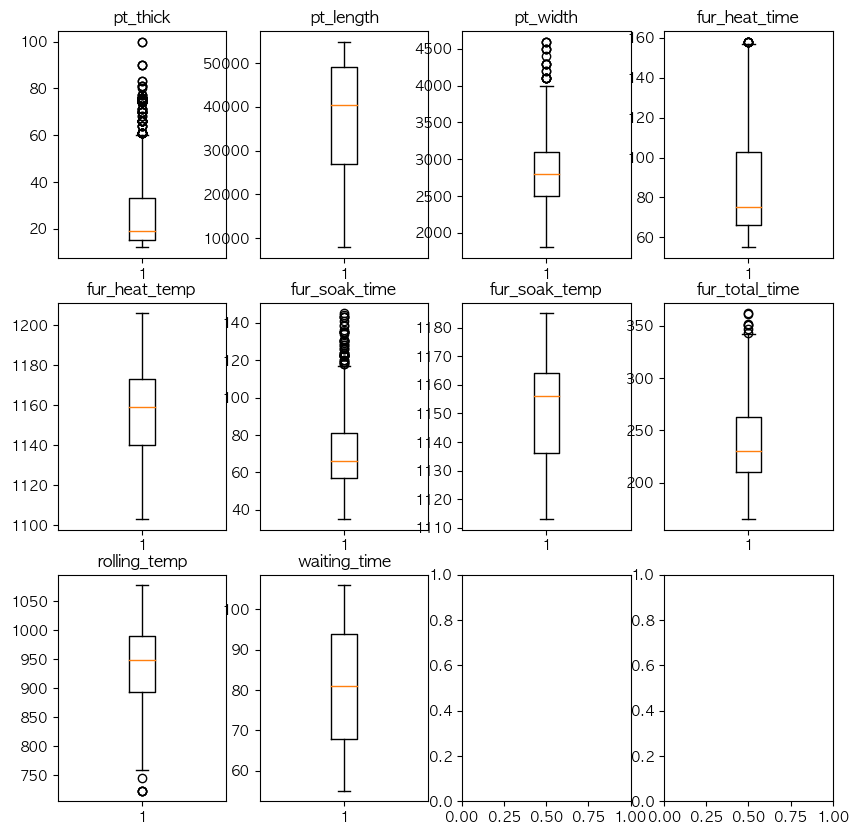

In [28]:
# box-plot
fig, axs = plt.subplots(3,4, figsize=(10,10))
axs = axs.flatten()

axs[0].boxplot(df_raw['pt_thick'])
axs[0].set_title('pt_thick')

axs[1].boxplot(df_raw['pt_length'])
axs[1].set_title('pt_length')

axs[2].boxplot(df_raw['pt_width'])
axs[2].set_title('pt_width')

axs[3].boxplot(df_raw['fur_heat_time'])
axs[3].set_title('fur_heat_time')

axs[4].boxplot(df_raw['fur_heat_temp'])
axs[4].set_title('fur_heat_temp')

axs[5].boxplot(df_raw['fur_soak_time'])
axs[5].set_title('fur_soak_time')

axs[6].boxplot(df_raw['fur_soak_temp'])
axs[6].set_title('fur_soak_temp')

axs[7].boxplot(df_raw['fur_total_time'])
axs[7].set_title('fur_total_time')

axs[8].boxplot(df_raw['rolling_temp'])
axs[8].set_title('rolling_temp')

axs[9].boxplot(df_raw['waiting_time'])
axs[9].set_title('waiting_time')

### scale 변환

In [29]:
from sklearn.preprocessing import RobustScaler

scale_cols = ['pt_thick', 'pt_length', 'pt_width', 'fur_soak_time', 'fur_total_time']
scaler = RobustScaler()

df_raw[scale_cols] = scaler.fit_transform(df_raw[scale_cols])

df_raw.head()

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use,fur_combine,waiting_time
0,2023-01-03 07:07:53,0,3,1,0.722222,1.500000,-1.146093,1,1144,116,1133,-0.291667,0.547170,1,934,8,1,1,1,84
1,2023-01-03 07:21:22,0,3,1,0.722222,1.500000,-1.146093,1,1144,122,1135,-0.541667,0.150943,1,937,8,1,1,2,63
2,2023-01-03 07:31:15,0,1,1,0.777778,1.333333,-0.960362,1,1129,116,1121,-0.458333,0.528302,1,889,8,1,1,3,87
3,2023-01-03 07:41:01,0,1,1,0.777778,1.333333,-0.960362,1,1152,125,1127,0.083333,0.679245,1,885,8,1,1,4,73
4,2023-01-03 07:52:40,0,4,1,1.055556,0.500000,-1.227633,1,1140,134,1128,-0.750000,0.301887,1,873,8,1,1,5,64


### 히스토그램

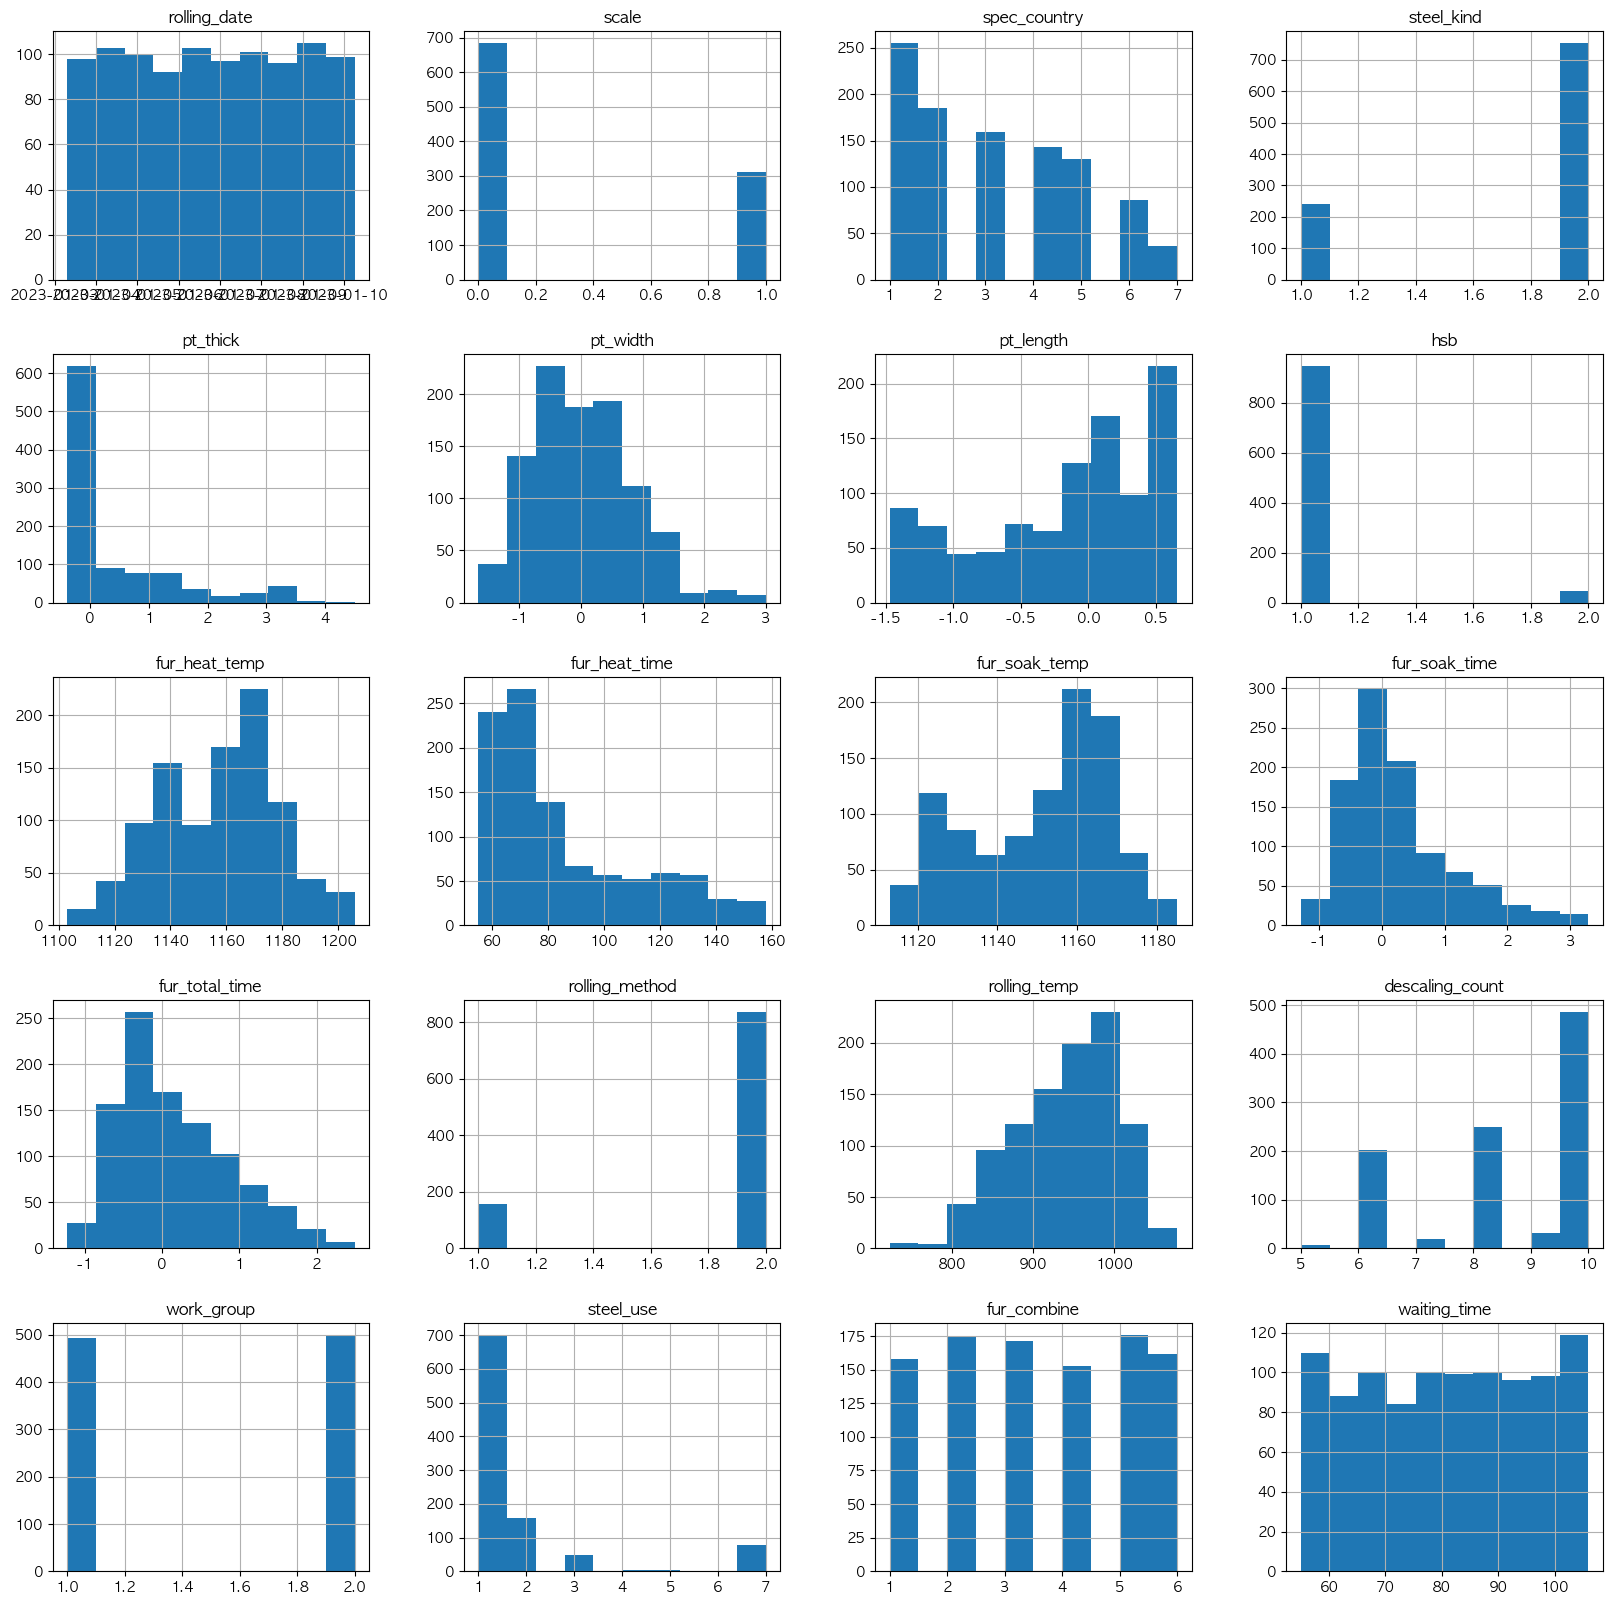

In [30]:
df_raw.hist(figsize = (20, 20)) 
fig.subplots_adjust(wspace=0.4, hspace=0.6)

### 상관관계

<Axes: >

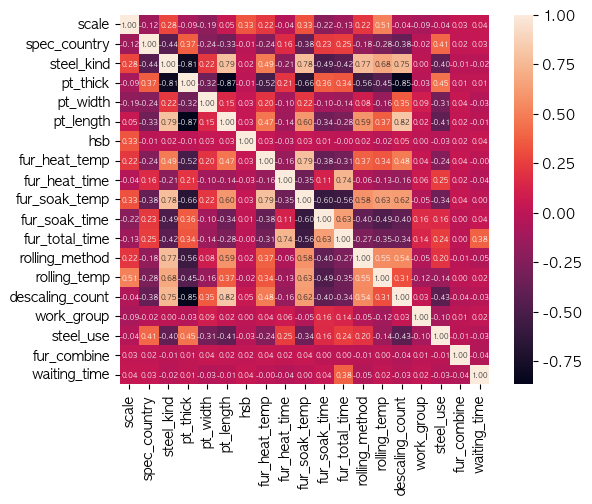

In [31]:
sns.heatmap(df_raw.corr(), annot = True, square = True, fmt = '.2f', annot_kws={'size': 5})

In [32]:
# 범주형 변수 목록
categorical_vars = [
    'spec_country', 'steel_kind', 'hsb', 'rolling_method', 
    'work_group', 'steel_use', 'fur_combine']

# 수치형 변수 목록
numerical_vars = [
    'pt_thick', 'pt_width', 'pt_length',
    'fur_heat_temp', 'fur_heat_time',
    'fur_soak_temp', 'fur_soak_time',
    'fur_total_time', 'rolling_temp',
    'descaling_count', 'waiting_time'
]

# 목표변수
target = 'scale'

## > t-test :  scale vs. 수치형 변수

### > 가정확인 : t-test
- 1) 정규성
- 2) 등분산성



### 1) 정규성

< 정규성 검정 (Shapiro-Wilk) >
pt_thick: statistic = 0.7481, p-value = 0.0000
pt_width: statistic = 0.9744, p-value = 0.0000
pt_length: statistic = 0.9149, p-value = 0.0000
fur_heat_temp: statistic = 0.9867, p-value = 0.0000
fur_heat_time: statistic = 0.8614, p-value = 0.0000
fur_soak_temp: statistic = 0.9365, p-value = 0.0000
fur_soak_time: statistic = 0.9053, p-value = 0.0000
fur_total_time: statistic = 0.9552, p-value = 0.0000
rolling_temp: statistic = 0.9723, p-value = 0.0000
descaling_count: statistic = 0.7725, p-value = 0.0000
waiting_time: statistic = 0.9541, p-value = 0.0000


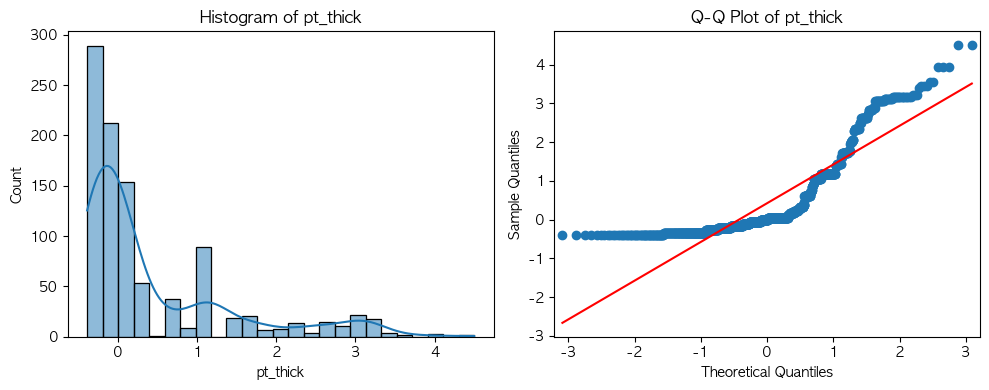

In [33]:
print("< 정규성 검정 (Shapiro-Wilk) >")
for var in numerical_vars:
    stat, p = shapiro(df_raw[var])
    print(f"{var}: statistic = {stat:.4f}, p-value = {p:.4f}")

# 시각화 예시 : pt_thick
var = 'pt_thick'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df_raw[var], kde=True, ax=ax[0])
ax[0].set_title(f'Histogram of {var}')

sm.qqplot(df_raw[var], line='s', ax=ax[1])
ax[1].set_title(f'Q-Q Plot of {var}')

plt.tight_layout()
plt.show()

### 2) 등분산성

In [34]:
from scipy.stats import levene

print("\n< 등분산성 검정 (Levene’s test) >")
for var in numerical_vars:
    group0 = df_raw[df_raw['scale'] == 0][var]
    group1 = df_raw[df_raw['scale'] == 1][var]
    stat, p = levene(group0, group1)
    print(f"{var}: statistic = {stat:.4f}, p-value = {p:.4f}")



< 등분산성 검정 (Levene’s test) >
pt_thick: statistic = 33.7864, p-value = 0.0000
pt_width: statistic = 0.2290, p-value = 0.6324
pt_length: statistic = 88.2880, p-value = 0.0000
fur_heat_temp: statistic = 16.3428, p-value = 0.0001
fur_heat_time: statistic = 4.8166, p-value = 0.0284
fur_soak_temp: statistic = 99.7779, p-value = 0.0000
fur_soak_time: statistic = 32.2029, p-value = 0.0000
fur_total_time: statistic = 37.9422, p-value = 0.0000
rolling_temp: statistic = 17.4189, p-value = 0.0000
descaling_count: statistic = 9.7080, p-value = 0.0019
waiting_time: statistic = 0.0358, p-value = 0.8500


> t-test 검정 - 가정 확인 결과
- 정규성과 등분산성을 만족하지 않기 때문에 t-test를 수행할 수 없다.

## > chi-squared test : scale vs. 범주형 변수 

In [35]:
chi2_results = {}

for var in categorical_vars:
    contingency = pd.crosstab(df_raw[var], df_raw[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results[var] = p
    
# 결과 분류
significant_chi2 = {var: p for var, p in chi2_results.items() if p < 0.05}
nonsignificant_chi2 = {var: p for var, p in chi2_results.items() if p >= 0.05}


print("< Chi-squared Test Result >\n")

print("유의한 변수 (p < 0.05):")
if significant_chi2:
    for var, p in significant_chi2.items():
        print(f" - {var}: {p:.4f}")
else:
    print(" - 없음")

print("\n유의하지 않은 변수 (p ≥ 0.05):")
for var, p in nonsignificant_chi2.items():
    print(f" - {var}: {p:.4f}")

< Chi-squared Test Result >

유의한 변수 (p < 0.05):
 - spec_country: 0.0000
 - steel_kind: 0.0000
 - hsb: 0.0000
 - rolling_method: 0.0000
 - work_group: 0.0051
 - steel_use: 0.0000

유의하지 않은 변수 (p ≥ 0.05):
 - fur_combine: 0.1751


## 04. Model

## Rogistic Regression

### get_dummies 범주형 변수 처리

In [36]:
df_model = pd.get_dummies(df_raw[categorical_vars + numerical_vars + ['scale']], columns=categorical_vars)


In [37]:
pd.set_option('display.max_columns', None)  # 모든 컬럼 보이게 설정
df_model.describe(include='all')


,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,waiting_time,scale,spec_country_1,spec_country_2,spec_country_3,spec_country_4,spec_country_5,spec_country_6,spec_country_7,steel_kind_1,steel_kind_2,hsb_1,hsb_2,rolling_method_1,rolling_method_2,work_group_1,work_group_2,steel_use_1,steel_use_2,steel_use_3,steel_use_4,steel_use_5,steel_use_6,steel_use_7,fur_combine_1,fur_combine_2,fur_combine_3,fur_combine_4,fur_combine_5,fur_combine_6
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.425106,0.056673,-0.160314,1157.343058,85.981891,1151.013078,0.239437,0.163433,940.278672,8.564386,80.933602,0.311871,0.256539,0.186117,0.159960,0.143863,0.130785,0.086519,0.036217,0.242455,0.757545,0.952716,0.047284,0.158954,0.841046,0.496982,0.503018,0.705231,0.159960,0.047284,0.004024,0.003018,0.002012,0.078471,0.158954,0.175050,0.172032,0.153924,0.177062,0.162978
std,0.999617,0.820991,0.628785,21.223598,26.388027,17.290913,0.860503,0.721820,63.855087,1.599465,14.972940,0.463491,0.436943,0.389397,0.366753,0.351128,0.337334,0.281271,0.186924,0.428784,0.428784,0.212352,0.212352,0.365817,0.365817,0.500243,0.500243,0.456168,0.366753,0.212352,0.063340,0.054882,0.044834,0.269046,0.365817,0.380201,0.377598,0.361057,0.381914,0.369531
min,-0.388889,-1.666667,-1.472254,1103.000000,55.000000,1113.000000,-1.291667,-1.226415,723.000000,5.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.222222,-0.500000,-0.605889,1140.000000,66.000000,1136.000000,-0.375000,-0.377358,894.000000,8.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1159.000000,75.000000,1156.000000,0.000000,0.000000,948.000000,9.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.777778,0.500000,0.394111,1173.000000,102.750000,1164.000000,0.625000,0.622642,991.000000,10.000000,94.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,3.000000,0.656852,1206.000000,158.000000,1185.000000,3.291667,2.490566,1078.000000,10.000000,106.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from sklearn.preprocessing import StandardScaler

X = df_model.drop(columns=['scale'])
y = df_model['scale']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]



print("Accuracy:", model.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


Accuracy: 0.8592964824120602
AUC: 0.9197841726618705
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       139
           1       0.75      0.80      0.77        60

    accuracy                           0.86       199
   macro avg       0.83      0.84      0.84       199
weighted avg       0.86      0.86      0.86       199



In [40]:
import numpy as np

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Odds Ratio', ascending=False)

print(coef_df)

             Feature  Coefficient  Odds Ratio
8       rolling_temp     1.532503    4.629752
21             hsb_2     1.010583    2.747203
3      fur_heat_temp     0.734287    2.083995
17    spec_country_7     0.534869    1.707225
4      fur_heat_time     0.390609    1.477880
5      fur_soak_temp     0.372077    1.450744
19      steel_kind_2     0.332739    1.394783
26       steel_use_1     0.322899    1.381125
28       steel_use_3     0.258229    1.294635
33     fur_combine_1     0.199548    1.220851
38     fur_combine_6     0.181927    1.199527
12    spec_country_2     0.115532    1.122471
30       steel_use_5     0.090649    1.094885
7     fur_total_time     0.080317    1.083630
27       steel_use_2     0.040021    1.040833
24      work_group_1     0.031447    1.031947
10      waiting_time     0.021140    1.021365
11    spec_country_1     0.017379    1.017531
23  rolling_method_2     0.000537    1.000537
22  rolling_method_1    -0.000537    0.999463
25      work_group_2    -0.031447 

In [41]:
print("\n변수 영향력 (상위 정렬):")
print(coef_df.head(10))


변수 영향력 (상위 정렬):
           Feature  Coefficient  Odds Ratio
8     rolling_temp     1.532503    4.629752
21           hsb_2     1.010583    2.747203
3    fur_heat_temp     0.734287    2.083995
17  spec_country_7     0.534869    1.707225
4    fur_heat_time     0.390609    1.477880
5    fur_soak_temp     0.372077    1.450744
19    steel_kind_2     0.332739    1.394783
26     steel_use_1     0.322899    1.381125
28     steel_use_3     0.258229    1.294635
33   fur_combine_1     0.199548    1.220851


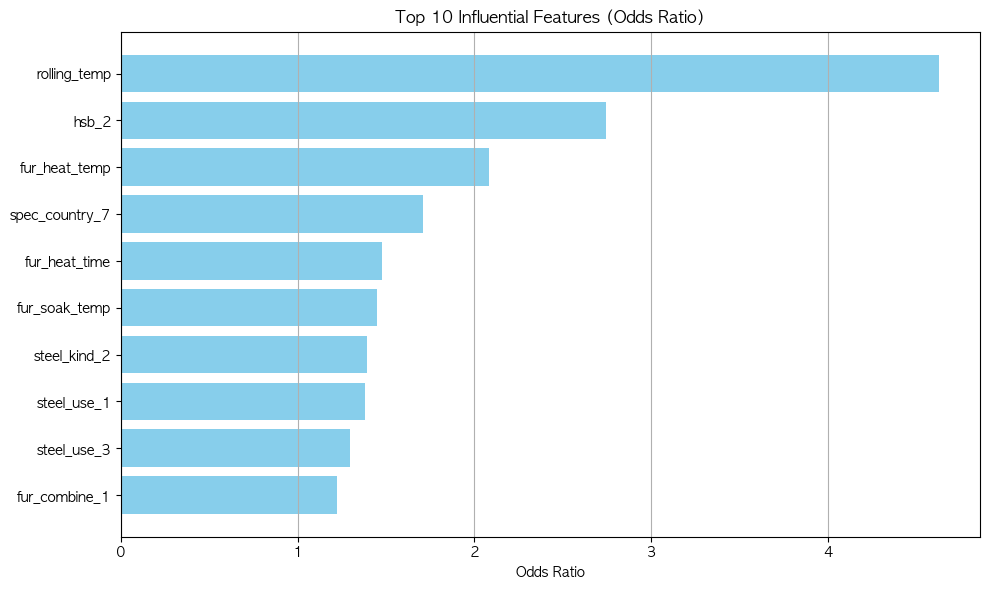

In [42]:
import matplotlib.pyplot as plt

# 상위 10개만 시각화 (원하면 전체도 가능)
top_n = 10
top_coef = coef_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_coef['Feature'], top_coef['Odds Ratio'], color='skyblue')
plt.xlabel("Odds Ratio")
plt.title(f"Top {top_n} Influential Features (Odds Ratio)")
plt.gca().invert_yaxis()  # 가장 큰 값이 위로 오도록
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [43]:
# 두 개의 성능 차이를 보고 
print('학습셋 모델 정확도', model.score(X_train, y_train))
print('테스트셋 모델 정확도', model.score(X_test, y_test))

학습셋 모델 정확도 0.8817610062893082
테스트셋 모델 정확도 0.8592964824120602


## Decision Tree

In [44]:
df_x = df_raw.drop(columns = 'scale')
df_y = df_raw['scale']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234, stratify = df_y) 
print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (994, 19)
분할 후 설명변수 데이터 :Train (695, 19)   Test (299, 19)


In [45]:
# 목표변수 'scale'의 빈도 확인
class_distribution = df_raw['scale'].value_counts()

# 각 클래스의 비율 출력
print(class_distribution)

# 비율로 표현
print("scale=1 비율: {:.2f}%".format(class_distribution[1] / len(df_raw) * 100))
print("scale=0 비율: {:.2f}%".format(class_distribution[0] / len(df_raw) * 100))

0    684
1    310
Name: scale, dtype: int64
scale=1 비율: 31.19%
scale=0 비율: 68.81%


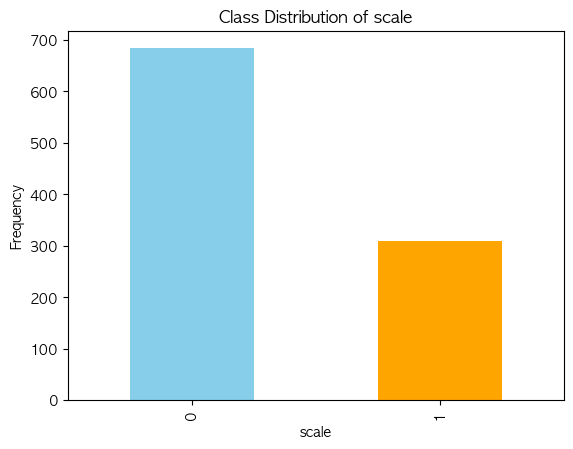

In [46]:
import matplotlib.pyplot as plt

# 불균형 클래스 시각화
df_raw['scale'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution of scale')
plt.xlabel('scale')
plt.ylabel('Frequency')
plt.show()

In [47]:
# 훈련 데이터에서 rolling_date 열 제거
df_train_x = df_train_x.drop(columns=['rolling_date'])
df_train_x = df_train_x.drop(columns=['hsb'])

In [48]:
# 테스트 데이터에서도 rolling_date 열 제거
df_test_x = df_test_x.drop(columns=['rolling_date'])
df_test_x = df_test_x.drop(columns=['hsb'])

In [49]:
# 의사결정나무 모델 생성
tree_uncust = DecisionTreeClassifier(random_state=1234)

# 모델 훈련 (훈련 데이터를 사용)
tree_uncust.fit(df_train_x, df_train_y)

# 실행옵션 확인
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [50]:
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.920


scale 변수의 고유 값 분포:
0    684
1    310
Name: scale, dtype: int64
----------------------------------------
spec_country 변수의 고유 값 분포:
1    255
2    185
3    159
4    143
5    130
6     86
7     36
Name: spec_country, dtype: int64
----------------------------------------
steel_kind 변수의 고유 값 분포:
2    753
1    241
Name: steel_kind, dtype: int64
----------------------------------------
hsb 변수의 고유 값 분포:
1    947
2     47
Name: hsb, dtype: int64
----------------------------------------
rolling_method 변수의 고유 값 분포:
2    836
1    158
Name: rolling_method, dtype: int64
----------------------------------------
work_group 변수의 고유 값 분포:
2    500
1    494
Name: work_group, dtype: int64
----------------------------------------
steel_use 변수의 고유 값 분포:
1    701
2    159
7     78
3     47
4      4
5      3
6      2
Name: steel_use, dtype: int64
----------------------------------------
fur_combine 변수의 고유 값 분포:
5    176
2    174
3    171
6    162
1    158
4    153
Name: fur_combine, dtype: int64
---------------

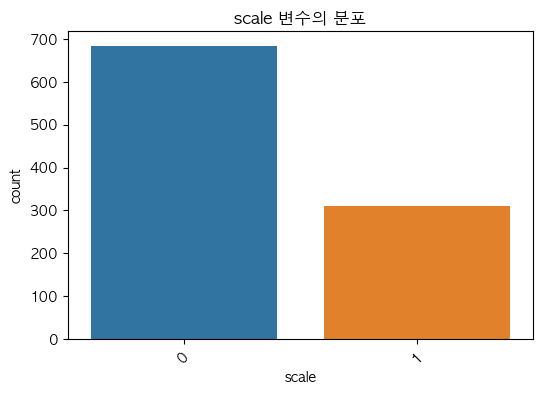

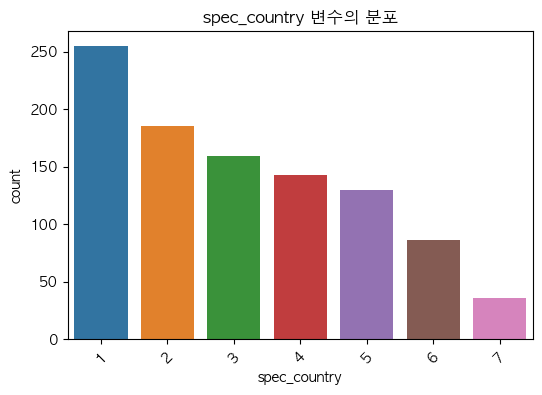

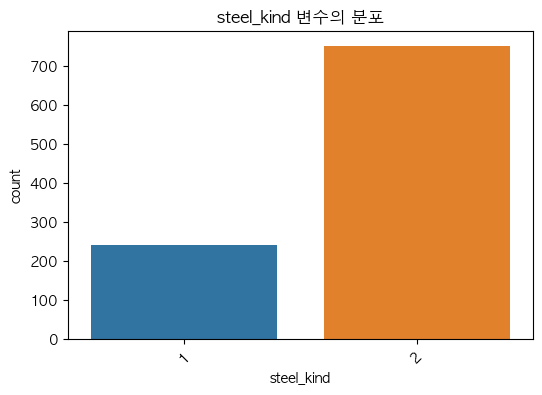

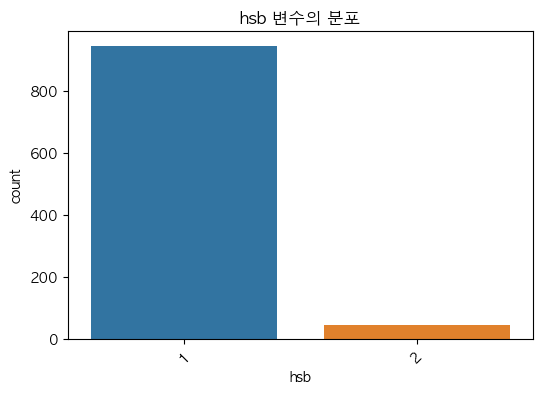

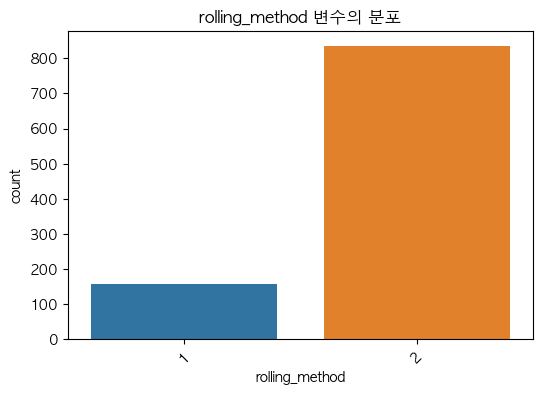

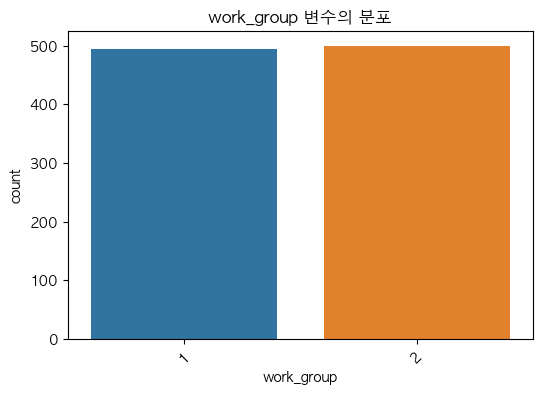

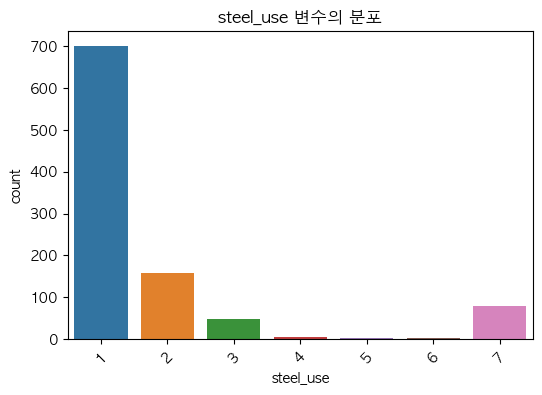

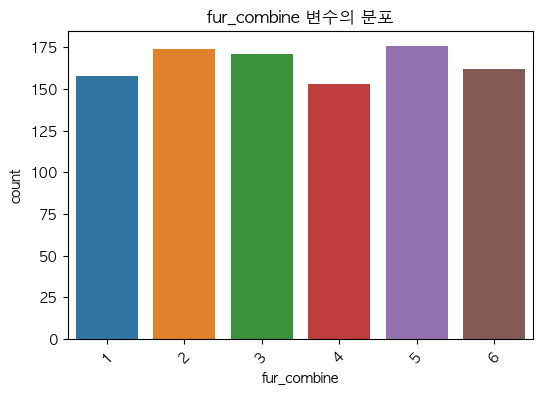

In [51]:
# 범주형 변수 목록
categorical_vars = [
    'scale', 'spec_country', 'steel_kind', 'hsb', 'rolling_method', 
    'work_group', 'steel_use', 'fur_combine']

# 각 범주형 변수의 분포 확인
for var in categorical_vars:
    print(f"{var} 변수의 고유 값 분포:")
    print(df_raw[var].value_counts())  # 고유 값 개수 출력
    print("-" * 40)

# 시각화: 각 범주형 변수에 대한 클래스 분포
import matplotlib.pyplot as plt
import seaborn as sns

for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, data=df_raw)  # 변수별 분포를 시각화
    plt.title(f"{var} 변수의 분포")
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.show()


In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# SMOTE 적용: 훈련 데이터를 오버샘플링하여 소수 클래스의 데이터를 인위적으로 늘려줍니다.
smote = SMOTE(random_state=1234)
df_train_x_resampled, df_train_y_resampled = smote.fit_resample(df_train_x, df_train_y)

# SMOTE로 생성된 데이터의 분포 확인
print("Resampled class distribution:", pd.Series(df_train_y_resampled).value_counts())

# DecisionTreeClassifier 모델 학습
tree_model = DecisionTreeClassifier(random_state=1234)
tree_model.fit(df_train_x_resampled, df_train_y_resampled)

# 예측 및 평가
y_pred = tree_model.predict(df_test_x)
print("Classification Report:")
print(classification_report(df_test_y, y_pred))

Resampled class distribution: 1    478
0    478
Name: scale, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       206
           1       0.82      0.91      0.86        93

    accuracy                           0.91       299
   macro avg       0.89      0.91      0.90       299
weighted avg       0.91      0.91      0.91       299



In [53]:
# 범주형 변수 목록
categorical_vars = [
    'scale', 'spec_country', 'steel_kind', 'hsb', 'rolling_method', 
    'work_group', 'steel_use', 'fur_combine']

# 각 범주형 변수의 분포 확인
for var in categorical_vars:
    print(f"{var} 변수의 고유 값 분포:")
    print(df_raw[var].value_counts())  # 고유 값 개수 출력
    print("-" * 40)


scale 변수의 고유 값 분포:
0    684
1    310
Name: scale, dtype: int64
----------------------------------------
spec_country 변수의 고유 값 분포:
1    255
2    185
3    159
4    143
5    130
6     86
7     36
Name: spec_country, dtype: int64
----------------------------------------
steel_kind 변수의 고유 값 분포:
2    753
1    241
Name: steel_kind, dtype: int64
----------------------------------------
hsb 변수의 고유 값 분포:
1    947
2     47
Name: hsb, dtype: int64
----------------------------------------
rolling_method 변수의 고유 값 분포:
2    836
1    158
Name: rolling_method, dtype: int64
----------------------------------------
work_group 변수의 고유 값 분포:
2    500
1    494
Name: work_group, dtype: int64
----------------------------------------
steel_use 변수의 고유 값 분포:
1    701
2    159
7     78
3     47
4      4
5      3
6      2
Name: steel_use, dtype: int64
----------------------------------------
fur_combine 변수의 고유 값 분포:
5    176
2    174
3    171
6    162
1    158
4    153
Name: fur_combine, dtype: int64
---------------

In [54]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경.
para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [55]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.917,0.936
1,4,0.917,0.936
2,5,0.918,0.936
3,6,0.942,0.957
4,7,0.944,0.957
5,8,0.954,0.963
6,9,0.965,0.957
7,10,0.976,0.946
8,11,0.984,0.940


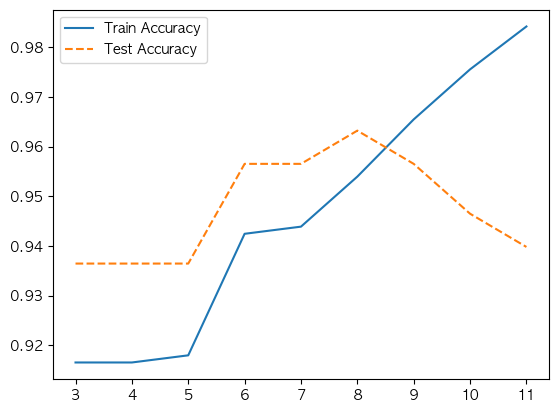

In [56]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [57]:
v_feature_name = df_train_x.columns

In [58]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=6, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [59]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.942,0.957
1,30,0.942,0.957
2,40,0.942,0.957
3,50,0.942,0.957
4,60,0.942,0.957
5,70,0.942,0.957
6,80,0.942,0.957
7,90,0.942,0.957
8,100,0.919,0.933
9,110,0.919,0.933


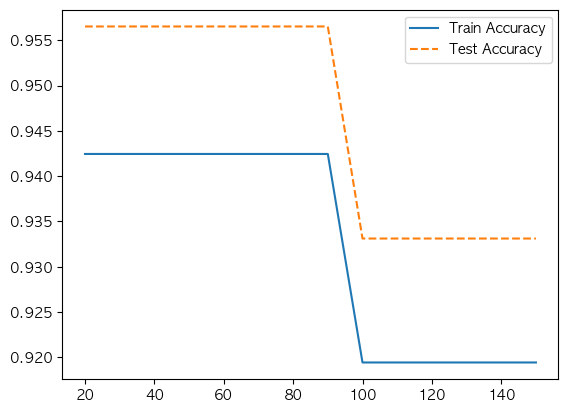

In [60]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [61]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 
para_leaf = [n_leaf * 2 for n_leaf in range(5,16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=100, max_depth=7, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [62]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.912,0.926
1,12,0.912,0.926
2,14,0.912,0.926
3,16,0.912,0.926
4,18,0.912,0.926
5,20,0.912,0.926
6,22,0.912,0.926
7,24,0.905,0.923
8,26,0.905,0.923
9,28,0.898,0.910


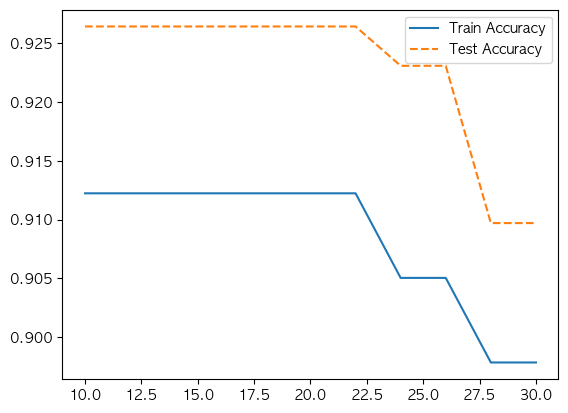

In [63]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [64]:
tree_final = DecisionTreeClassifier(max_depth=6, min_samples_split=100, min_samples_leaf=15, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, min_samples_split=100,
                       random_state=1234)

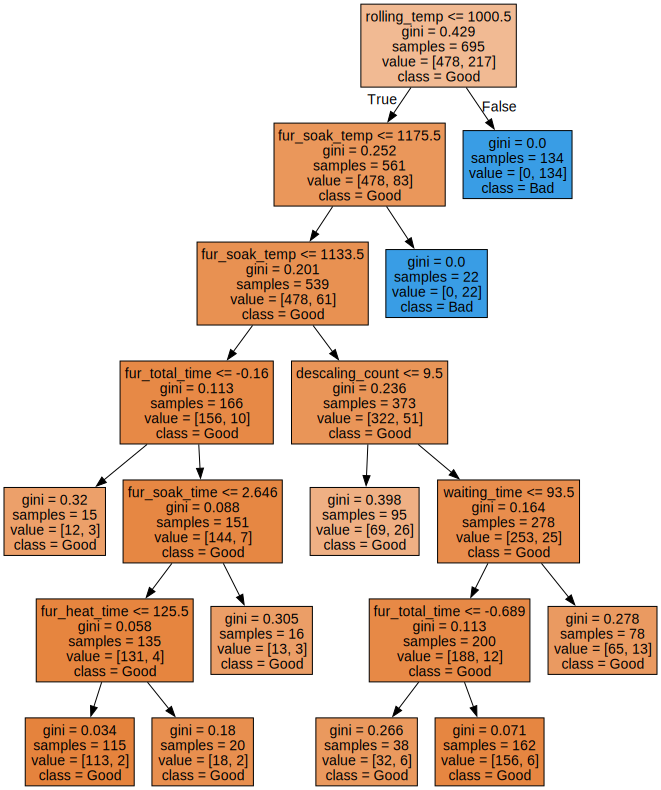

In [65]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
                feature_names = df_train_x.columns, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [66]:
y_pred = tree_final.predict(df_train_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_train_y, y_pred)))
print(classification_report(df_train_y, y_pred, digits=3))
print("-"*70)
y_pred = tree_final.predict(df_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Test Accuracy: 0.912

Test Confusion matrix: 
[[478   0]
 [ 61 156]]
              precision    recall  f1-score   support

           0      0.887     1.000     0.940       478
           1      1.000     0.719     0.836       217

    accuracy                          0.912       695
   macro avg      0.943     0.859     0.888       695
weighted avg      0.922     0.912     0.908       695

----------------------------------------------------------------------
Test Accuracy: 0.926

Test Confusion matrix: 
[[206   0]
 [ 22  71]]
              precision    recall  f1-score   support

           0      0.904     1.000     0.949       206
           1      1.000     0.763     0.866        93

    accuracy                          0.926       299
   macro avg      0.952     0.882     0.908       299
weighted avg      0.934     0.926     0.923       299



In [67]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3).head(10)

,Feature,Importance
11,rolling_temp,0.785
7,fur_soak_temp,0.173
12,descaling_count,0.024
9,fur_total_time,0.008
16,waiting_time,0.006
8,fur_soak_time,0.004
6,fur_heat_time,0.001
5,fur_heat_temp,0.000
1,steel_kind,0.000
4,pt_length,0.000


Text(0, 0.5, '설명변수')

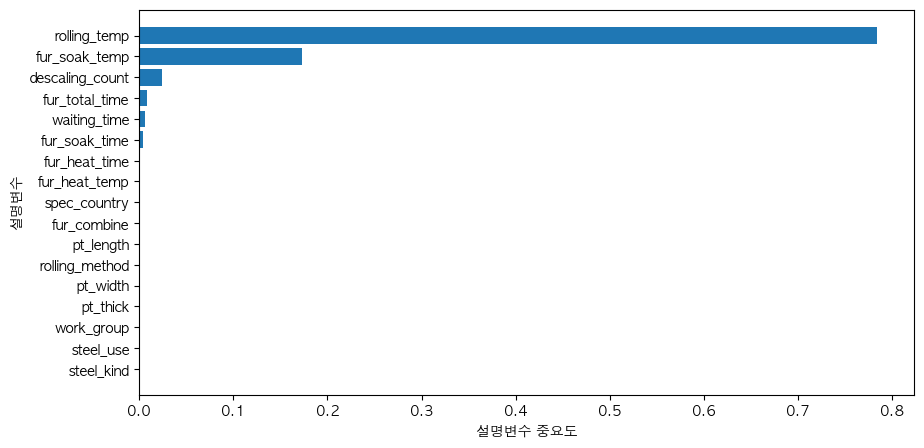

In [68]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## Random Forest

In [69]:
df_x = df_raw.drop(columns = 'scale')
df_y = df_raw['scale']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234, stratify = df_y) 
print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (994, 19)
분할 후 설명변수 데이터 :Train (695, 19)   Test (299, 19)


In [70]:
# 목표변수 빈도 확인
print(df_raw['scale'].value_counts(), "\n")
print("scale=1 비율  ", df_raw['scale'].value_counts()[1] / len(df_raw))

0    684
1    310
Name: scale, dtype: int64 

scale=1 비율   0.3118712273641851


In [71]:
# 훈련 데이터에서 rolling_date 열 제거
df_train_x = df_train_x.drop(columns=['rolling_date'])
df_train_x = df_train_x.drop(columns=['hsb'])

In [72]:
# 테스트 데이터에서도 rolling_date 열 제거
df_test_x = df_test_x.drop(columns=['rolling_date'])
df_test_x = df_test_x.drop(columns=['hsb'])

In [73]:
# 랜덤 포레스트 모델 생성
rf_uncust = RandomForestClassifier(random_state=1234)
rf_uncust.fit(df_train_x, df_train_y)

RandomForestClassifier(random_state=1234)

In [74]:
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.940


In [75]:
# 모델의 파라미터 확인
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


In [76]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [77]:
para_n_tree

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [78]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.993,0.923
1,20,0.996,0.930
2,30,0.996,0.933
3,40,0.997,0.933
4,50,0.999,0.933
5,60,0.997,0.933
6,70,1.000,0.933
7,80,0.999,0.940
8,90,1.000,0.940
9,100,1.000,0.940


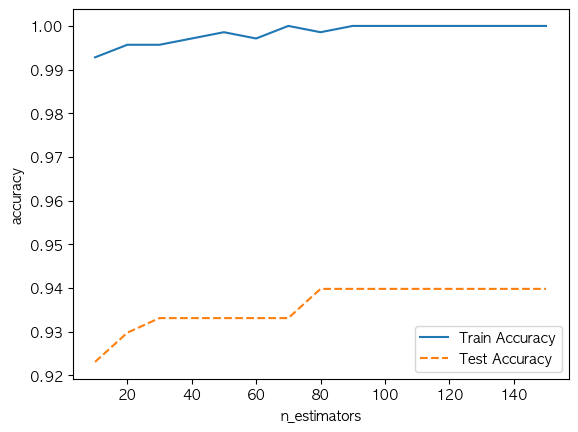

In [79]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [80]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(5, 121):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

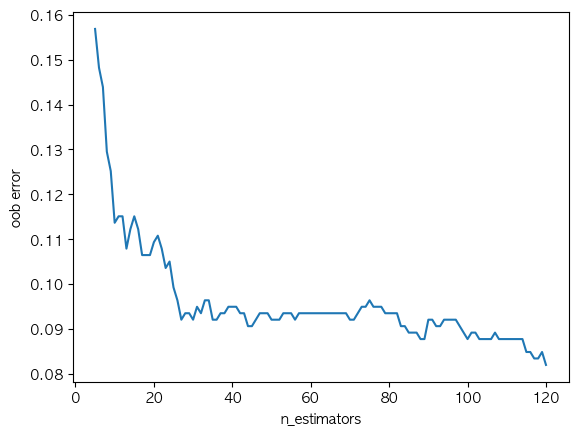

In [81]:
# 그래프로 표현
plt.plot(range(5, 121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [82]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(3, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=40, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [83]:
para_depth

[3, 4, 5, 6, 7, 8, 9, 10]

In [84]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.905,0.910
1,4,0.905,0.916
2,5,0.912,0.923
3,6,0.918,0.920
4,7,0.937,0.923
5,8,0.947,0.923
6,9,0.965,0.933
7,10,0.976,0.930


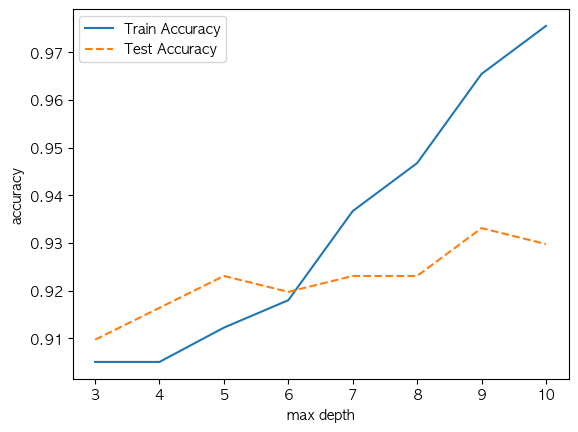

In [85]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

In [86]:
# 참조:적정 자료 수 검토:Train Data 자료 수
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  695 개
전체 자료의 1% =  6.95 개


In [87]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수.
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=7,
                                n_estimators=40, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [88]:
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [89]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.935,0.926
1,20,0.918,0.926
2,30,0.915,0.923
3,40,0.914,0.923
4,50,0.914,0.923
5,60,0.914,0.923
6,70,0.914,0.920
7,80,0.914,0.926
8,90,0.914,0.923
9,100,0.912,0.926


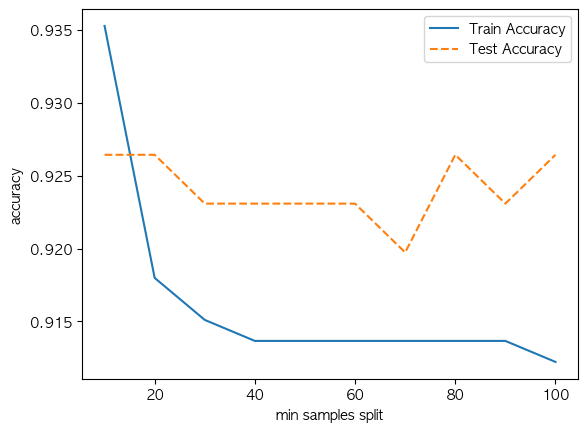

In [90]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [91]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=50,
                                max_depth=7, n_estimators=40, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [92]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [93]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.912,0.923
1,10,0.911,0.913
2,15,0.899,0.903
3,20,0.882,0.866
4,25,0.879,0.863
5,30,0.879,0.863
6,35,0.879,0.863
7,40,0.879,0.863
8,45,0.879,0.863
9,50,0.879,0.863


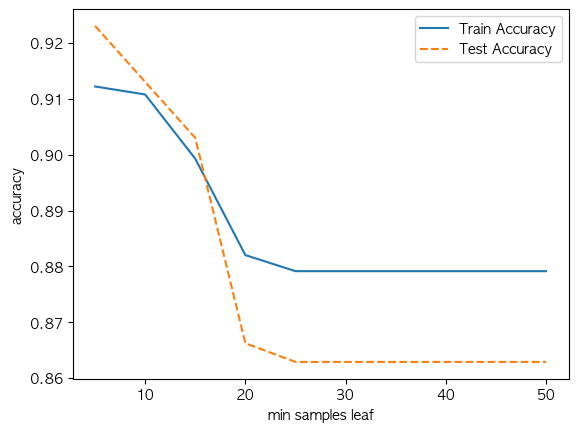

In [94]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

In [95]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=15, min_samples_split=50,
                                max_depth=7, n_estimators=40, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.899
Accuracy on test set: 0.903

Confusion matrix: 
[[206   0]
 [ 29  64]]
              precision    recall  f1-score   support

           0      0.877     1.000     0.934       206
           1      1.000     0.688     0.815        93

    accuracy                          0.903       299
   macro avg      0.938     0.844     0.875       299
weighted avg      0.915     0.903     0.897       299



In [96]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
11,rolling_temp,0.439
7,fur_soak_temp,0.083
4,pt_length,0.081
3,pt_width,0.080
12,descaling_count,0.076
5,fur_heat_temp,0.056
2,pt_thick,0.055
1,steel_kind,0.039
9,fur_total_time,0.020
8,fur_soak_time,0.016


Text(0, 0.5, '설명변수')

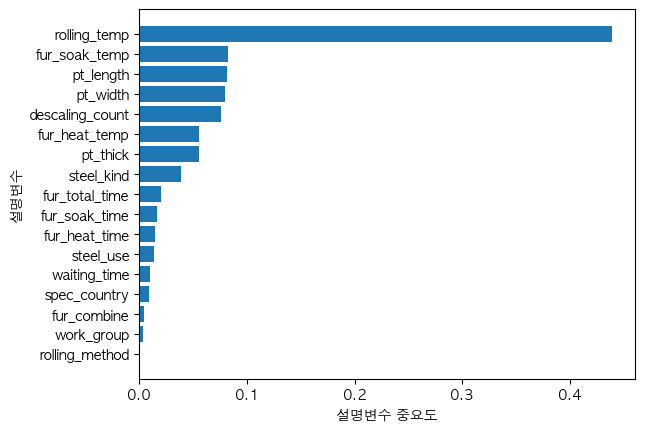

In [97]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## 그래디언트 부스팅 - xgboost

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_model.drop("scale", axis = 1, inplace = False)
df_raw_y = df_model["scale"]

In [100]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (994, 39)
분할 후 설명변수 데이터 :Train (695, 39)   Test (299, 39)


### 모델 생성

In [101]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.993


In [102]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


#### GridSearch

In [103]:
from sklearn.model_selection import GridSearchCV

# 파라미터 값 설정
para_lr = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]  # 학습률 (learning rate) 값 설정
para_depth = [3, 4, 5, 6, 7, 8, 9, 10]  # 최대 깊이 (max depth) 값 설정
para_leaf = [1, 2, 5, 10]  # 최소 샘플 수 (min samples per leaf) 값 설정

# 모델 생성
estimator = GradientBoostingRegressor(random_state=1234)

# 파라미터 그리드 설정
param_grid = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "max_features": ["auto", "sqrt", "log2"],
    "learning_rate": para_lr,
    "max_depth": para_depth,
    "min_samples_leaf": para_leaf
}

# GridSearchCV 설정
grid_gb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)

# 모델 학습
grid_gb.fit(df_train_x, df_train_y)

# 최적의 모델, 파라미터, 성능 출력
print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingRegressor(max_depth=5, max_features='sqrt', random_state=1234)

best parameter: 
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1}

best score: 
0.921


In [104]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred, y_prob):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob[:,1])
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [105]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)
# xgboost_uncust
xgboost_uncust.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 1234,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred,y_prob):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
   # AUC = roc_auc_score(y_test, y_pred)
    Auc = roc_auc_score(y_test, y_prob)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(Auc))

xgb_prob_train = xgboost_uncust.predict_proba(df_train_x)[:, 1] # 수정

# 모델 평가
eval_class_model(df_train_y, xgb_pred_train, xgb_prob_train) # 수정

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
xgb_prob_test = xgboost_uncust.predict_proba(df_test_x)[:,1] # 수정

# 모델 평가
eval_class_model(df_test_y, xgb_pred_test, xgb_prob_test) # 수정


 모델 생성 및 평가 : Train 

오차행렬:
 [[473   0]
 [  0 222]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[211   0]
 [  3  85]] 

정확도: 0.9900
정밀도: 1.0000
재현율: 0.9659
F1    : 0.9827
AUC   : 0.9936


In [107]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)
xgb_prob_train = xgboost_user.predict_proba(df_train_x)[:, 1] # 수정

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train,xgb_prob_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)
xgb_prob_test = xgboost_user.predict_proba(df_test_x)[:,1] # 수정


print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test,xgb_prob_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[473   0]
 [  0 222]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       222

    accuracy                           1.00       695
   macro avg       1.00      1.00      1.00       695
weighted avg       1.00      1.00      1.00       695


 사용자 모델 평가 : Test 

오차행렬:
 [[210   1]
 [  3  85]] 

정확도: 0.9866
정밀도: 0.9884
재현율: 0.9659
F1    : 0.9770
AUC   : 0.9900

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       211
           1       0.99      0.97      0.98        88

    accuracy                           0.99       299
   macro avg       0.99      0.98      0.98       299
weighted avg       0.99      0.99      0.99       299



{'pt_thick': 64.0, 'pt_width': 6.0, 'pt_length': 47.0, 'fur_heat_temp': 49.0, 'fur_heat_time': 11.0, 'fur_soak_temp': 77.0, 'fur_soak_time': 30.0, 'fur_total_time': 34.0, 'rolling_temp': 122.0, 'descaling_count': 135.0, 'waiting_time': 38.0, 'spec_country_1': 6.0, 'spec_country_4': 4.0, 'spec_country_5': 6.0, 'spec_country_7': 1.0, 'hsb_1': 54.0, 'rolling_method_1': 2.0, 'work_group_1': 1.0, 'steel_use_1': 2.0, 'fur_combine_1': 7.0, 'fur_combine_6': 4.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

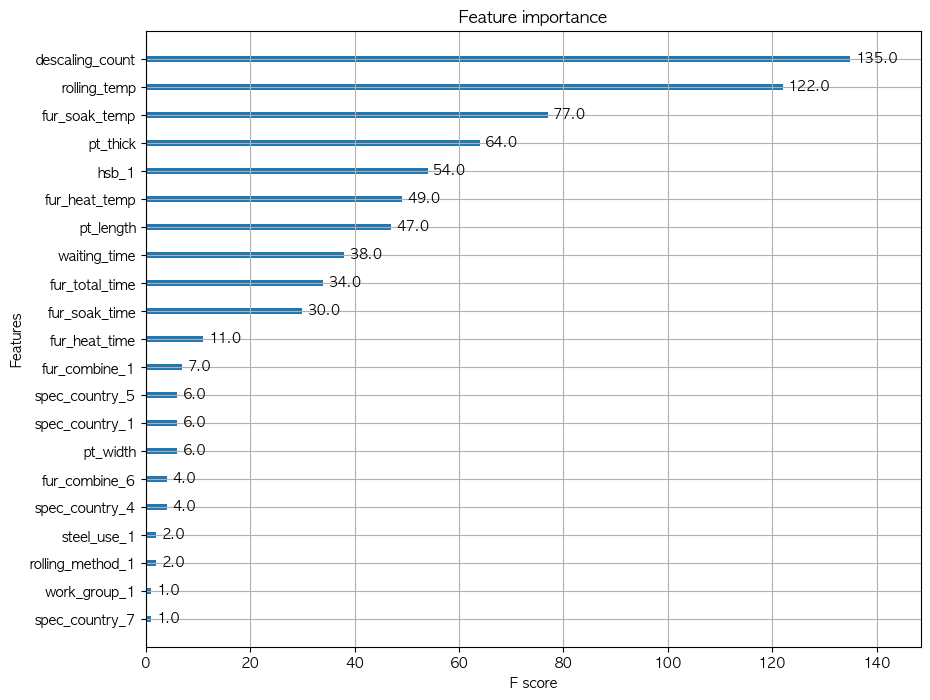

In [108]:
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgboost_user.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgboost_user, ax=ax)

In [109]:
# 범주형 변수 목록
categorical_vars = [
    'spec_country', 'steel_kind', 'hsb', 'rolling_method', 
    'work_group', 'steel_use', 'fur_combine']

# 수치형 변수 목록
numerical_vars = [
    'pt_thick', 'pt_width', 'pt_length',
    'fur_heat_temp', 'fur_heat_time',
    'fur_soak_temp', 'fur_soak_time',
    'fur_total_time', 'rolling_temp',
    'descaling_count', 'waiting_time'
]

# 목표변수
target = 'scale'

## SVM

### get_dummies 범주형 변수 처리

In [110]:
df_raw.head(5)

,rolling_date,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,steel_use,fur_combine,waiting_time
0,2023-01-03 07:07:53,0,3,1,0.722222,1.500000,-1.146093,1,1144,116,1133,-0.291667,0.547170,1,934,8,1,1,1,84
1,2023-01-03 07:21:22,0,3,1,0.722222,1.500000,-1.146093,1,1144,122,1135,-0.541667,0.150943,1,937,8,1,1,2,63
2,2023-01-03 07:31:15,0,1,1,0.777778,1.333333,-0.960362,1,1129,116,1121,-0.458333,0.528302,1,889,8,1,1,3,87
3,2023-01-03 07:41:01,0,1,1,0.777778,1.333333,-0.960362,1,1152,125,1127,0.083333,0.679245,1,885,8,1,1,4,73
4,2023-01-03 07:52:40,0,4,1,1.055556,0.500000,-1.227633,1,1140,134,1128,-0.750000,0.301887,1,873,8,1,1,5,64


In [111]:
df_dummies = pd.get_dummies(df_raw[categorical_vars], drop_first=True)

df_model = pd.concat([df_raw[numerical_vars + ['scale']], df_dummies], axis=1)


In [112]:
df_model.head(5)

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,waiting_time,scale,spec_country,steel_kind,hsb,rolling_method,work_group,steel_use,fur_combine
0,0.722222,1.500000,-1.146093,1144,116,1133,-0.291667,0.547170,934,8,84,0,3,1,1,1,1,1,1
1,0.722222,1.500000,-1.146093,1144,122,1135,-0.541667,0.150943,937,8,63,0,3,1,1,1,1,1,2
2,0.777778,1.333333,-0.960362,1129,116,1121,-0.458333,0.528302,889,8,87,0,1,1,1,1,1,1,3
3,0.777778,1.333333,-0.960362,1152,125,1127,0.083333,0.679245,885,8,73,0,1,1,1,1,1,1,4
4,1.055556,0.500000,-1.227633,1140,134,1128,-0.750000,0.301887,873,8,64,0,4,1,1,1,1,1,5


### 모델 생성

In [113]:
from sklearn.preprocessing import StandardScaler

X = df_model.drop(columns=['scale'])
y = np.where(df_model['scale'] == 0, 1, 0) # 불량을 1, 양품을 0

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# OverSampling
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

model = SVC(random_state=1234,kernel='rbf',class_weight='balanced', probability=True)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

In [115]:
# 실행옵션 확인
print(model.get_params().keys())
print(model.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, 'balanced', 0.0, 'ovr', 3, 'scale', 'rbf', -1, True, 1234, True, 0.001, False])


### 하이퍼파라미터 C조정

In [116]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_c = [0.1 * c for c in range(1, 13)] )] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_resampled, y_resampled))
    test_accuracy.append(svm.score(X_resampled, y_resampled))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [117]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.500,0.500
1,0.10,0.807,0.807
2,1.00,0.885,0.885
3,10.00,0.940,0.940
4,100.00,0.992,0.992


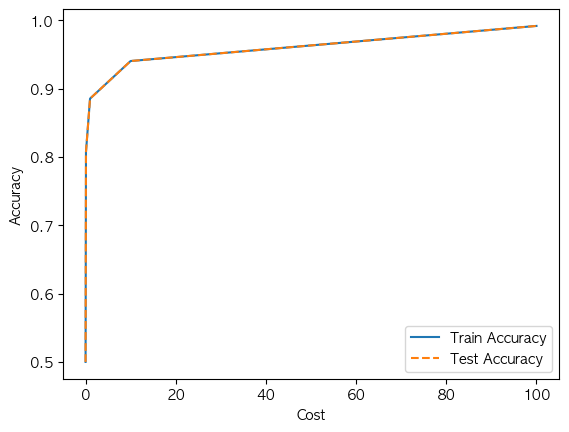

In [118]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [119]:
# Cost 미세 변화에 따른 모델 성능

In [120]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 100, random_state = 1234)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_resampled, y_resampled))
    test_accuracy.append(svm.score(X_resampled, y_resampled))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

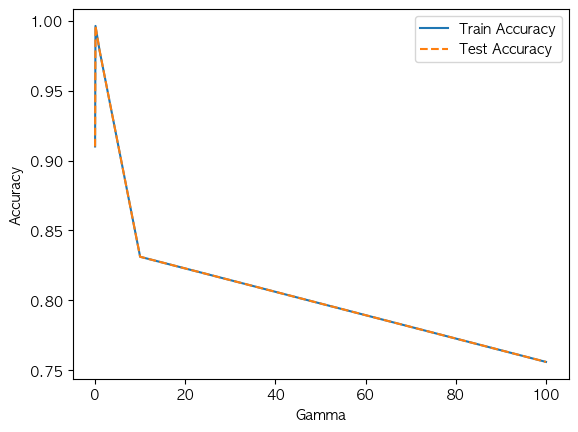

In [121]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

### 하이퍼파라미터(gamma) 조정

In [122]:
# Gamma 미세 변화에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 100, random_state = 1234)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_resampled, y_resampled))
    test_accuracy.append(svm.score(X_resampled, y_resampled))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [123]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.9963,0.9963
1,0.2,0.9982,0.9982
2,0.3,0.9982,0.9982
3,0.4,0.9963,0.9963
4,0.5,0.9917,0.9917
5,0.6,0.9890,0.9890
6,0.7,0.9881,0.9881
7,0.8,0.9844,0.9844
8,0.9,0.9835,0.9835
9,1.0,0.9789,0.9789


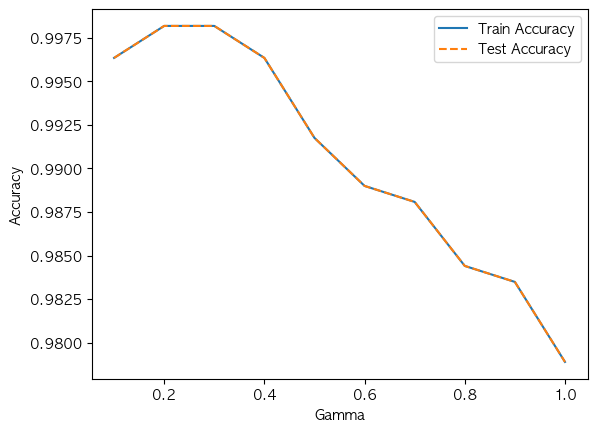

In [124]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

### 모델 평가

In [125]:
# 최종 모델
svc_final = SVC(gamma=0.1, C=100, random_state=1234, class_weight='balanced',probability=True)
svc_final.fit(X_train, y_train)

# 평가
y_pred = svc_final.predict(X_test)
y_prob = svc_final.predict_proba(X_test)[:, 1]  # ROC-AUC용 확률값
y_pred_custom = (y_prob >= 0.3).astype(int)  # 낮추면 recall ↑
print(classification_report(y_test, y_pred_custom))

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(X_resampled, y_resampled)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(X_resampled, y_resampled)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(y_test, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        60
           1       0.87      0.96      0.91       139

    accuracy                           0.87       199
   macro avg       0.87      0.81      0.83       199
weighted avg       0.87      0.87      0.86       199

Train Accucary : 0.996
Test Accuracy : 0.996

Test Confusion matrix: 
[[ 48  12]
 [  8 131]]
              precision    recall  f1-score   support

           0      0.857     0.800     0.828        60
           1      0.916     0.942     0.929       139

    accuracy                          0.899       199
   macro avg      0.887     0.871     0.878       199
weighted avg      0.898     0.899     0.898       199



- 불량(1), 양품(0)의 F1 score 값이 0.74, 0.87로 좋은 성능을 보인다.
- Precision과 recall의 값도 불량, 양품을 잘 설명하고 있다.

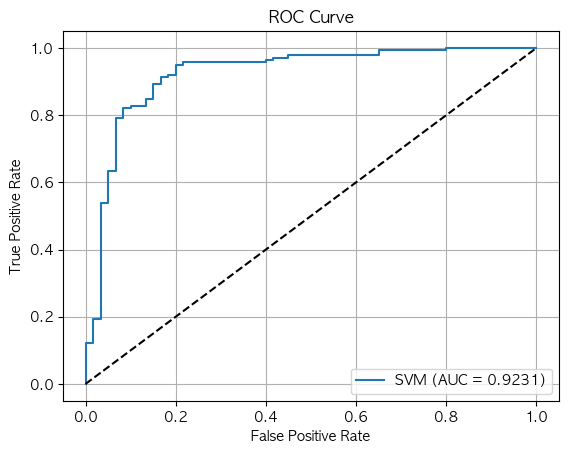

In [126]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='SVM (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

### Grid Search

In [127]:
# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

print(f'Train set dimension is {X_resampled.shape}')
print(f'Test set dimension is {y_resampled.shape}')

Train set dimension is (1090, 18)
Test set dimension is (1090,)


In [128]:
svc = SVC(random_state=2021)
param_grid = [{'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'], 'degree':[2, 3, 5],'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['rbf'], 'gamma': ['auto', 'scale'],'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['sigmoid'], 'gamma': ['auto', 'scale'],'C': [0.1, 1, 10, 100, 1000]}]
# 커널함수에 따라 나누어지는 파라미터가 각각 달라지므로 모두 다르게 써서 커널에 맞게 묶어서 함수에 넣는다.

scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, scoring = f'{score}_macro', cv=10, verbose=1 ,n_jobs=12)
    CV_svc.fit(X_resampled, y_resampled)

    print("Best parameters set found on development set:")
    print()
    print(CV_svc.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = CV_svc.cv_results_['mean_test_score']
    stds = CV_svc.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, CV_svc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, CV_svc.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=12)
CV_svc.fit(X_train, y_train)

# Tuning hyper-parameters for precision

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best parameters set found on development set:

{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}

Grid scores on development set:

0.866 (+/-0.062) for {'C': 0.1, 'kernel': 'linear'}
0.865 (+/-0.059) for {'C': 1, 'kernel': 'linear'}
0.868 (+/-0.058) for {'C': 10, 'kernel': 'linear'}
0.868 (+/-0.058) for {'C': 100, 'kernel': 'linear'}
0.867 (+/-0.060) for {'C': 1000, 'kernel': 'linear'}
0.789 (+/-0.059) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.778 (+/-0.059) for {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
0.775 (+/-0.059) for {'C': 0.1, 'degree': 5, 'kernel': 'poly'}
0.843 (+/-0.055) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.883 (+/-0.048) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.822 (+/-0.066) for {'C': 1, 'degree': 5, 'kernel': 'poly'}
0.869 (+/-0.054) for {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.903 (+/-0.068) for {'C': 10, 'degree': 3, 'kernel': 'poly'}
0.888 (+/-0.054

GridSearchCV(cv=10, estimator=SVC(random_state=2021), n_jobs=12,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 5],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['sigmoid']}],
             verbose=1)

In [129]:
best_svc = CV_svc.best_estimator_
best_svc.fit(X_resampled, y_resampled)

SVC(C=10, gamma='auto', random_state=2021)

In [130]:
# Train set에 대한 성능
y_pred = best_svc.predict(X_resampled)
acc = accuracy_score(y_true = y_resampled, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = best_svc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:0.9679


Test set에 대한 성능
정확도:0.8945


In [131]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
recall = recall_score(y_true = y_test, y_pred =y_pred) ## 민감도
precision = precision_score(y_true = y_test, y_pred =y_pred) ## 정밀도


print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ')  

정확도:0.8945  |  민감도:0.9137  |  정밀도:0.9338


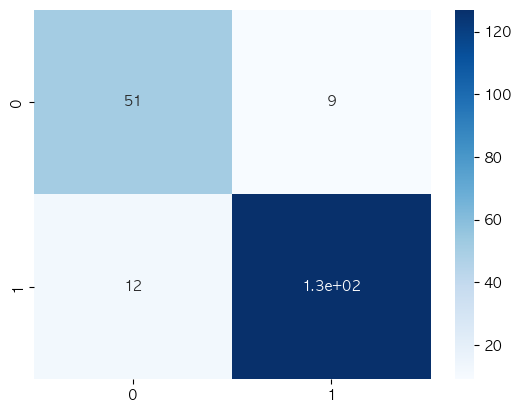

In [132]:
# Assuming you have calculated the confusion matrix already
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix with a specified colormap
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.show()